In [214]:
import pandas as pd
import numpy as np 
import csv 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import pearsonr
%matplotlib inline
pd.set_option('display.max_columns', None)

### EDA - Census data and RUCA

In [148]:
ruca_census_df = pd.read_csv('../data_preprocessing/ruca_census_final.csv')

In [149]:
ruca_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59873 entries, 0 to 59872
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     59873 non-null  int64  
 1   State Code                     59873 non-null  object 
 2   County Code                    59873 non-null  object 
 3   Geoid Tract 2010               59873 non-null  int64  
 4   Primary RUCA Code 2010         59873 non-null  int64  
 5   Community Type                 59873 non-null  object 
 6   Geoid Tract 2020               59873 non-null  int64  
 7   Land Area (in Sq. Miles) 2020  59873 non-null  float64
 8   Census Tract Name              59873 non-null  object 
 9   Population                     59873 non-null  int64  
 10  Hous_Units                     59873 non-null  int64  
 11  Income                         59873 non-null  float64
 12  Poverty%                       59873 non-null 

In [150]:
ruca_census_df.head()

,Unnamed: 0,State Code,County Code,Geoid Tract 2010,Primary RUCA Code 2010,Community Type,Geoid Tract 2020,Land Area (in Sq. Miles) 2020,Census Tract Name,Population,Hous_Units,Income,Poverty%,Employment%,Disability%,VacantHous%,OwnOcpHous%,Majority Race,Majority Race Percentage,Minority Race,Minority Race Percentage,Majority Gender,Majority Gender Percentage,Minority Gender,Minority Gender Percentage,Majority Age,Majority Age Percentage,Minority Age,Minority Age Percentage,Population Density,Housing Density
0,0,AL,Autauga County,1001020100,1,Urban,1001020100,9.825304,Census Tract 201; Autauga County; Alabama,1865,733,60563.0,0.153351,0.974255,0.200000,0.045020,0.708049,White%,0.804290,Black%,0.111528,Male%,0.519035,Female%,0.480965,18_64%,0.565684,Under18%,0.239678,189.816010,74.603290
1,2,AL,Autauga County,1001020300,1,Urban,1001020300,5.349271,Census Tract 203; Autauga County; Alabama,3492,1431,77371.0,0.100802,0.981748,0.158362,0.088050,0.637317,White%,0.691008,Black%,0.250859,Female%,0.539805,Male%,0.460195,18_64%,0.603666,Under18%,0.261741,652.799232,267.513087
2,3,AL,Autauga County,1001020400,1,Urban,1001020400,6.384282,Census Tract 204; Autauga County; Alabama,3987,1722,73191.0,0.102333,0.990933,0.222222,0.032520,0.758420,White%,0.879609,Black%,0.074492,Male%,0.510158,Female%,0.489842,18_64%,0.593930,65+%,0.260095,624.502489,269.724928
3,4,AL,Autauga County,1001020500,1,Urban,1001020501,6.203654,Census Tract 205.01; Autauga County; Alabama,4121,1857,79953.0,0.078379,0.994409,0.173016,0.039849,0.522886,White%,0.796166,Black%,0.150449,Female%,0.534336,Male%,0.465664,18_64%,0.685028,Under18%,0.181267,664.285919,299.339712
4,5,AL,Autauga County,1001020600,1,Urban,1001020600,8.041611,Census Tract 206; Autauga County; Alabama,3839,1551,64904.0,0.151081,0.969313,0.158896,0.135397,0.700193,White%,0.742120,Black%,0.173743,Female%,0.536338,Male%,0.463662,18_64%,0.531388,Under18%,0.297473,477.391906,192.871801


In [151]:
# drop index 1110 -- contains an extreme outlier 
ruca_census_df.drop(1110, inplace = True)

In [152]:
ruca_census_df.describe()

,Unnamed: 0,Geoid Tract 2010,Primary RUCA Code 2010,Geoid Tract 2020,Land Area (in Sq. Miles) 2020,Population,Hous_Units,Income,Poverty%,Employment%,Disability%,VacantHous%,OwnOcpHous%,Majority Race Percentage,Minority Race Percentage,Majority Gender Percentage,Minority Gender Percentage,Majority Age Percentage,Minority Age Percentage,Population Density,Housing Density
count,59872.000000,5.987200e+04,59872.000000,5.987200e+04,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000,59872.000000
mean,35475.574693,2.794170e+10,2.075862,2.792524e+10,95.300460,3987.476650,1702.111855,79306.775187,0.134922,0.942677,0.134437,0.106097,0.571796,0.743305,0.188439,0.533683,0.466317,0.615241,0.242464,2337.761835,1020.145098
std,20528.780646,1.574990e+10,2.516712,1.574925e+10,724.514427,1681.560842,679.288352,38952.991569,0.105258,0.045089,0.059622,0.102281,0.225620,0.176193,0.146694,0.031964,0.031964,0.078004,0.061285,5026.348730,2401.376751
min,0.000000,1.001020e+09,1.000000,1.001020e+09,0.022158,17.000000,10.000000,2499.000000,0.000000,0.383865,0.000000,0.000000,0.000000,0.035923,0.000000,0.500000,0.005879,0.376271,0.000000,0.019709,0.014883
25%,17619.750000,1.306304e+10,1.000000,1.305900e+10,1.557079,2765.000000,1221.000000,52813.000000,0.058555,0.924800,0.091660,0.040130,0.419814,0.618895,0.067493,0.511910,0.454138,0.566516,0.207323,161.572544,68.292659
50%,35546.500000,2.802595e+10,1.000000,2.801095e+10,3.896512,3814.000000,1632.000000,70633.000000,0.106294,0.953381,0.125674,0.077902,0.601857,0.774468,0.146727,0.525758,0.474242,0.607247,0.238688,997.819504,426.458143
75%,53264.250000,4.103900e+10,2.000000,4.103900e+10,24.661449,4988.250000,2097.000000,96503.500000,0.182489,0.973032,0.168187,0.137993,0.746095,0.892585,0.285520,0.545862,0.488090,0.651920,0.275210,2289.054611,950.240162
max,71274.000000,5.604595e+10,99.000000,5.604595e+10,63952.335592,38907.000000,12980.000000,250001.000000,0.857309,1.000000,0.792605,0.984976,1.000000,1.000000,0.986452,0.994121,0.500000,1.000000,0.492057,102265.547432,74690.856576


- Introductory step: creating a correlation matrix to see the relationship between numerical features, this will also aid in identifying variables that are multicollinear
- We will also visualize the distributions to check skewness and outliers
- Note: This dataset will be used to build a Logistic Regression model including the Bank Desert Status (target variable) 

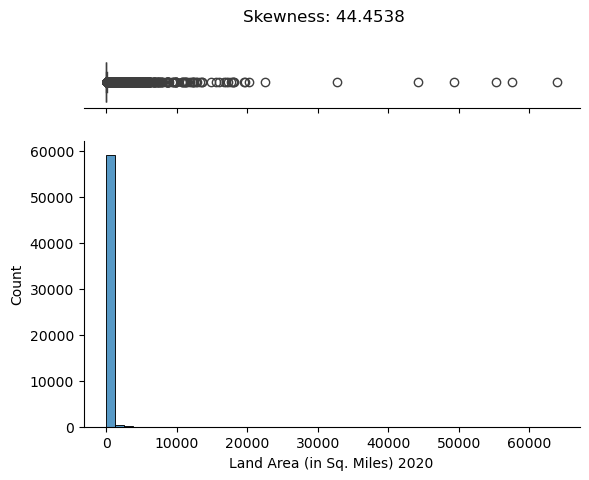

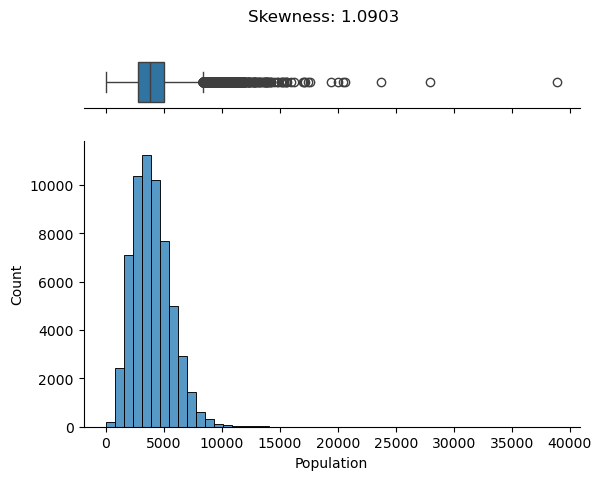

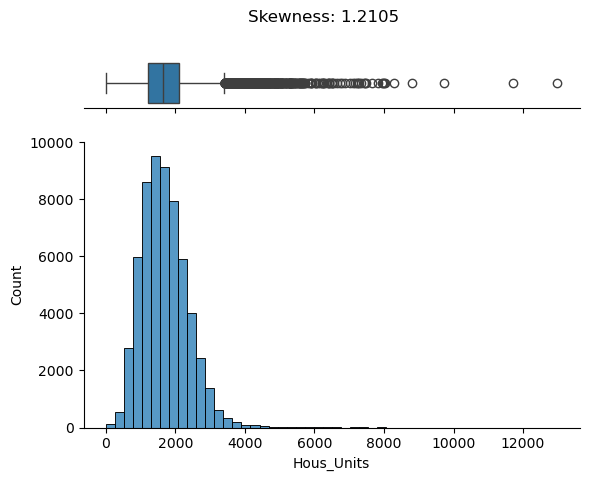

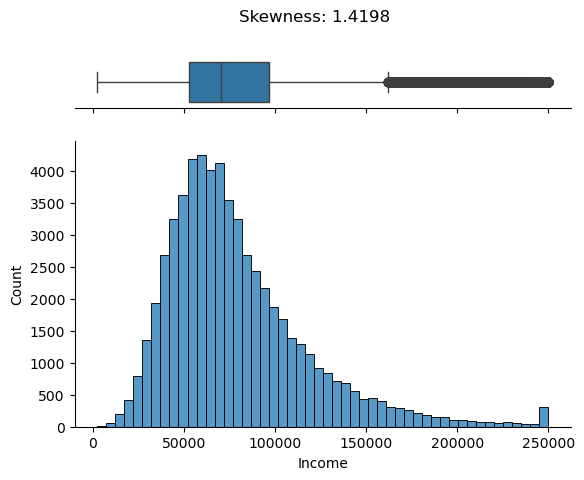

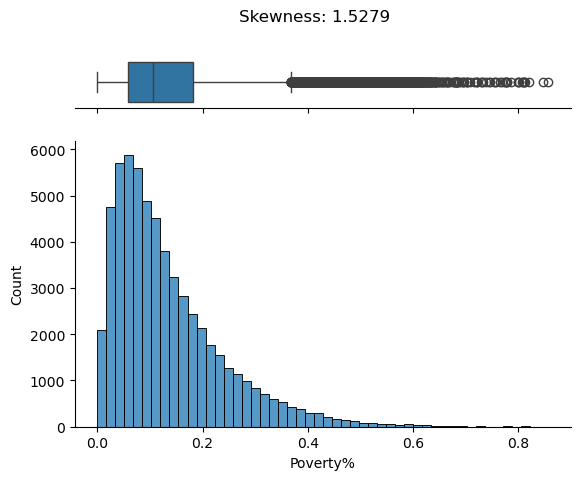

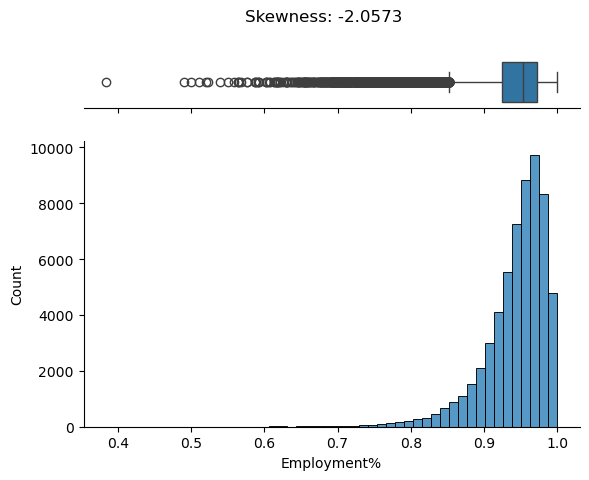

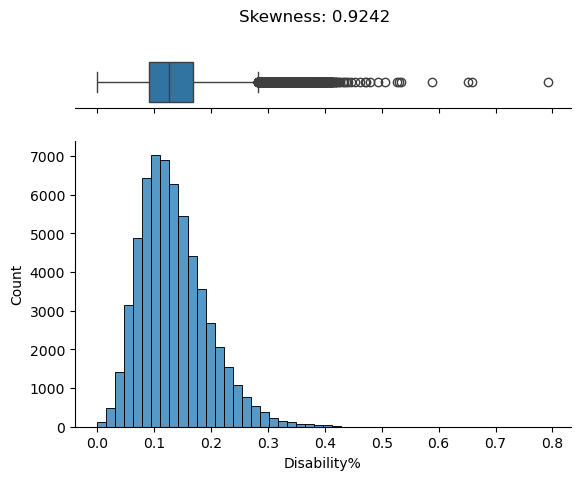

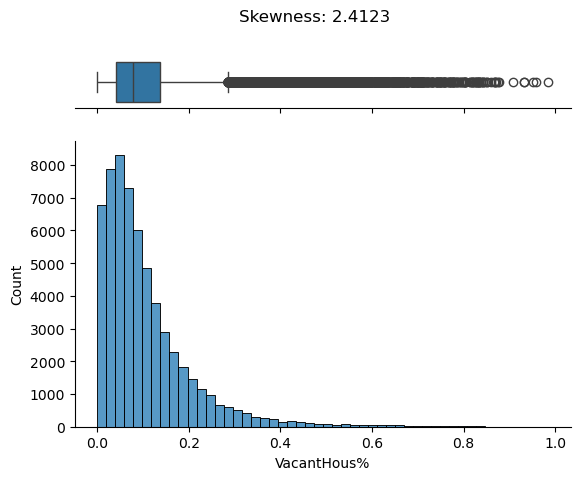

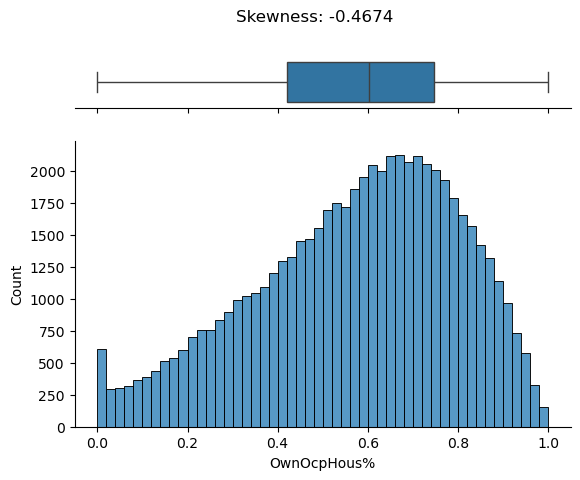

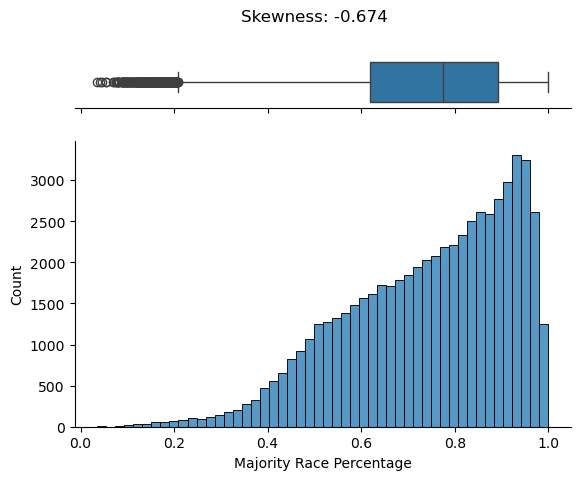

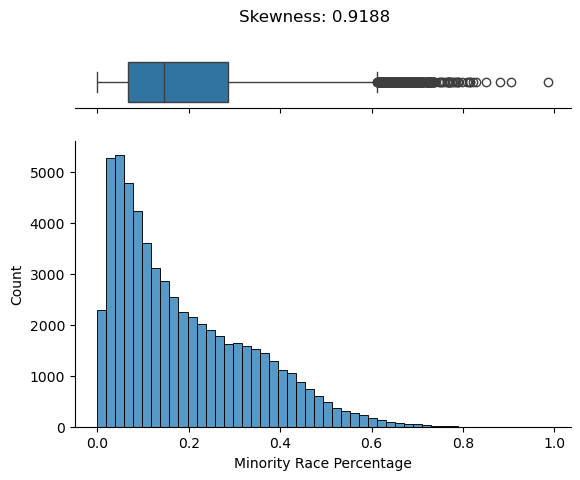

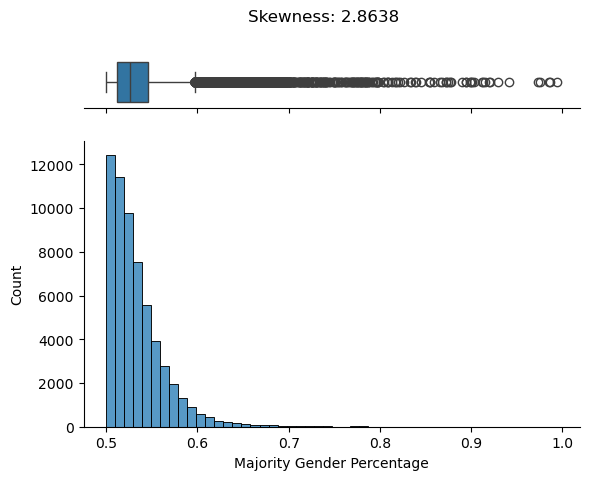

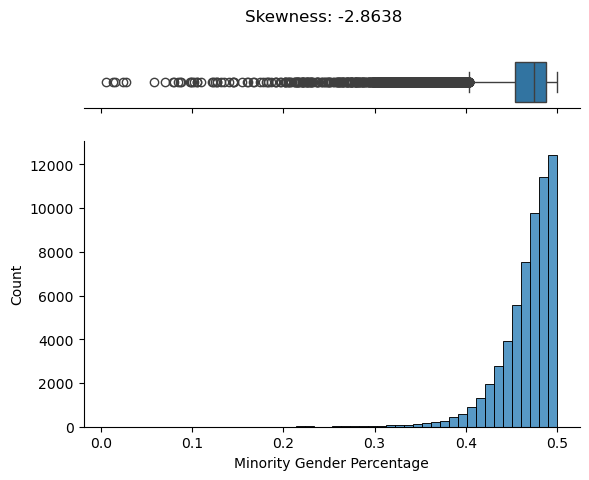

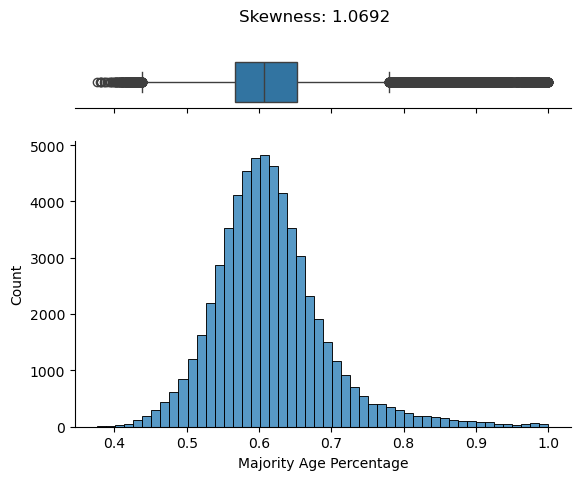

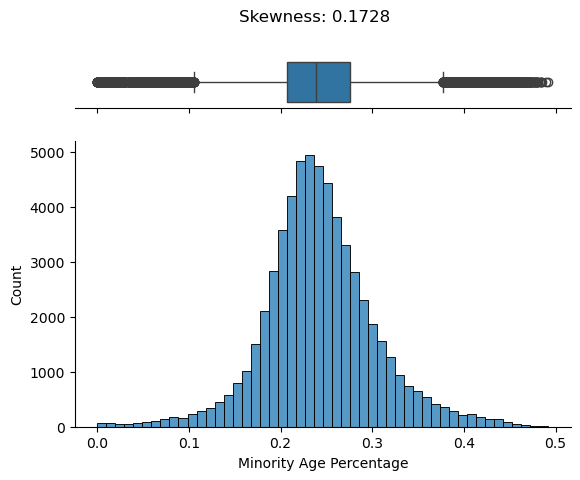

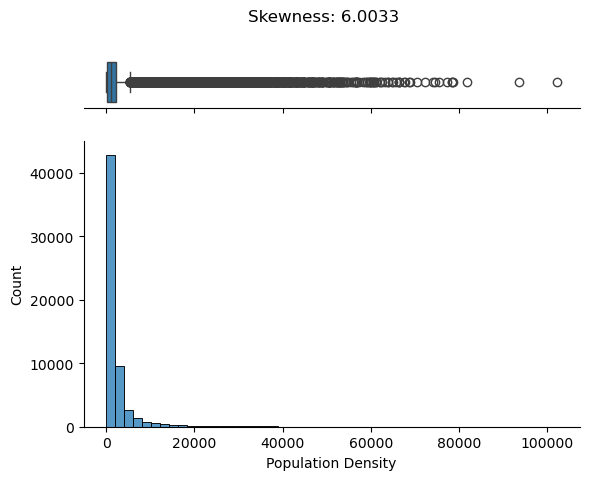

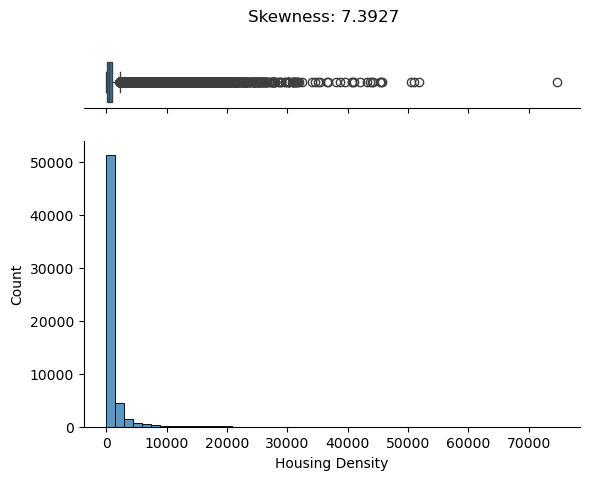

In [154]:
# since the target variable is not ready yet, we will explore relationships of numerical variables using the pearson correlation matrix 
# display histogram and boxplot of each numerical feature

# Select only numeric columns
numeric_columns = ruca_census_df[['Land Area (in Sq. Miles) 2020', 'Population', 'Hous_Units', 'Income', 'Poverty%', 'Employment%', 'Disability%', 'VacantHous%', 'OwnOcpHous%', 'Majority Race Percentage', 'Minority Race Percentage', 'Majority Gender Percentage', 'Minority Gender Percentage', 'Majority Age Percentage', 'Minority Age Percentage', 'Population Density', 'Housing Density']]
for col in numeric_columns.columns:
    fig, (ax_box, ax_hist) = plt.subplots(nrows= 2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data= ruca_census_df, x= col, ax= ax_box, orient= 'h')
    sns.histplot(data= ruca_census_df, x= col, ax= ax_hist, bins= 50)
    ax_box.set(yticks=[])
    fig.suptitle(f'Skewness: {np.round(ruca_census_df[col].skew(), 4)}')
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
plt.show()

##### Insights from Numerical Columns Visuals:
Non-Gaussian Distributions:
- Several numerical features do not exhibit a Gaussian (normal) distribution. 

Presence of Significant Outliers:
- Some features contain extreme outliers. These outliers can have a substantial impact on statistical measures like mean and standard deviation, potentially skewing results if not addressed.
  
Skewness:
- Many of the features are highly skewed, particularly those expressed as percentages. This means that the data are not symmetrically distributed and transformations might be necessary to address the skew.

##### Next steps:
- Apply transformations on the data to address skewness and bring the distribution closer to normality
- Investigate extreme outliers 
- Scale the features to bring magnitudes of the features in the same scale -- (note: application of lasso/ridge regularization on logistic regression model later)

##### Notes
- Using log transformation on numerical columns made some skewness worse than before, should use a transformation that can handle positive and negative skew
- Applying transformations on percentage data might distort the meaning of the data, decided to only transform highly skewed features that are not presented in percentages

In [156]:
skewed = numeric_columns.skew()

In [157]:
# land area contains one extreme outlier, due to this the skewness of population density and housing density is also affected
# investigate the outlier 
ext_outlier = numeric_columns['Land Area (in Sq. Miles) 2020'].idxmax()

The index 1110 in the ruca_census dataframe contains an extreme outlier, specifically under the Land Area column. This is causing a huge skew on the Land Area, Population Density and Housing Density columns. So we are going to drop it from the ruca_census dataframe.

In [175]:
# now let's transform land area, housing density and population density 
# we are not going to transform percentages 
highly_skewed_columns = skewed[abs(skewed) > 3].index 

# apply log transformation to the highly skewed columns in the numeric_columns DataFrame
numeric_columns_transformed = numeric_columns.copy()
numeric_columns_transformed[highly_skewed_columns] = numeric_columns_transformed[highly_skewed_columns].apply(np.log)

print(numeric_columns_transformed.head())

   Land Area (in Sq. Miles) 2020  Population  Hous_Units   Income  Poverty%  \
0                       2.284961        1865         733  60563.0  0.153351   
1                       1.676960        3492        1431  77371.0  0.100802   
2                       1.853839        3987        1722  73191.0  0.102333   
3                       1.825138        4121        1857  79953.0  0.078379   
4                       2.084629        3839        1551  64904.0  0.151081   

   Employment%  Disability%  VacantHous%  OwnOcpHous%  \
0     0.974255     0.200000     0.045020     0.708049   
1     0.981748     0.158362     0.088050     0.637317   
2     0.990933     0.222222     0.032520     0.758420   
3     0.994409     0.173016     0.039849     0.522886   
4     0.969313     0.158896     0.135397     0.700193   

   Majority Race Percentage  Minority Race Percentage  \
0                  0.804290                  0.111528   
1                  0.691008                  0.250859   
2          

In [177]:
numeric_columns_transformed.skew()

Land Area (in Sq. Miles) 2020    0.664988
Population                       1.090327
Hous_Units                       1.210485
Income                           1.419792
Poverty%                         1.527916
Employment%                     -2.057282
Disability%                      0.924180
VacantHous%                      2.412266
OwnOcpHous%                     -0.467437
Majority Race Percentage        -0.674010
Minority Race Percentage         0.918766
Majority Gender Percentage       2.863773
Minority Gender Percentage      -2.863773
Majority Age Percentage          1.069245
Minority Age Percentage          0.172786
Population Density              -0.832722
Housing Density                 -0.771617
dtype: float64

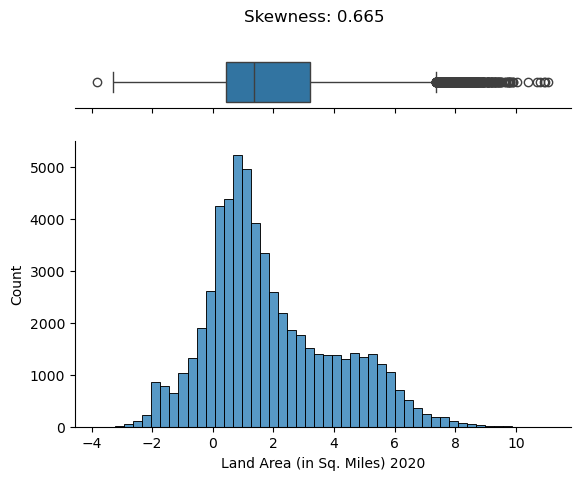

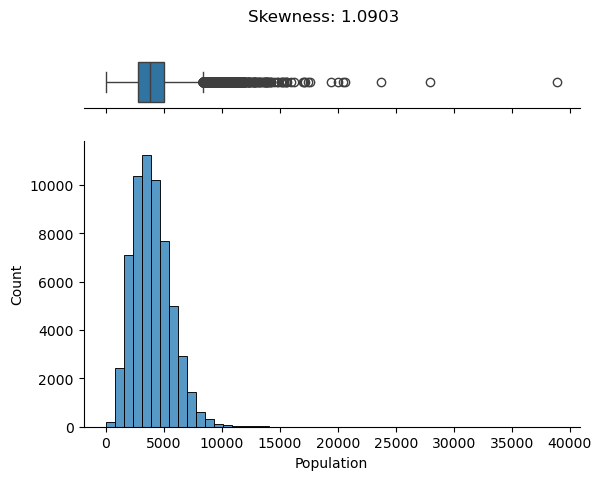

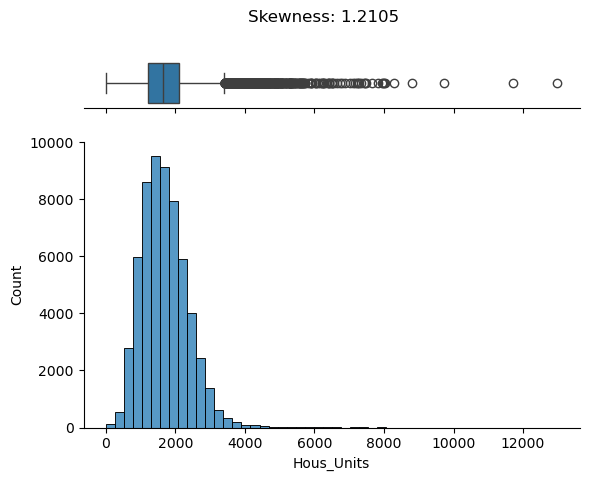

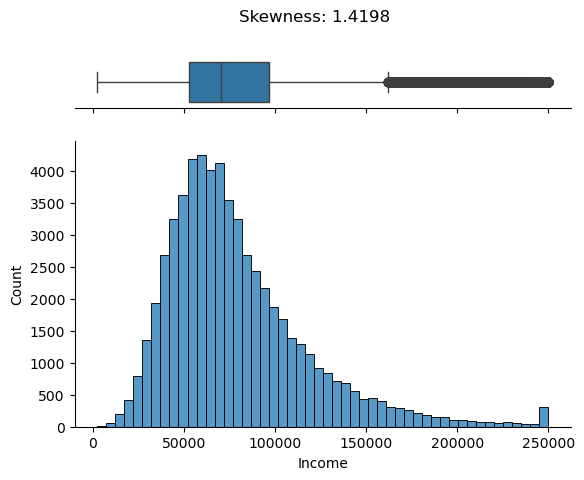

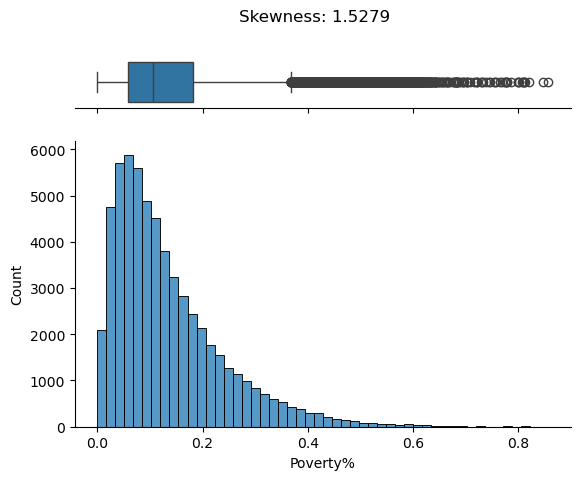

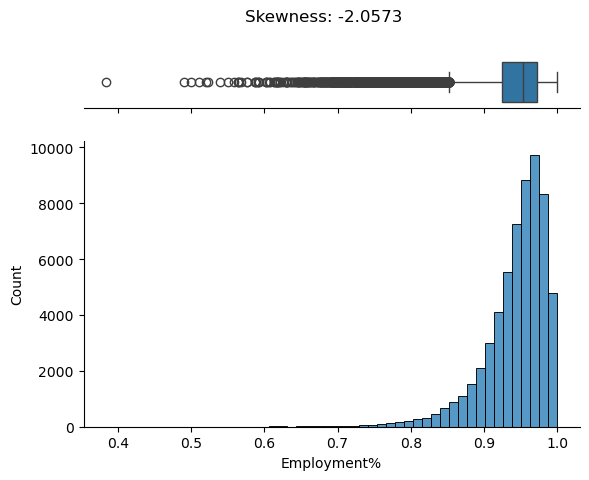

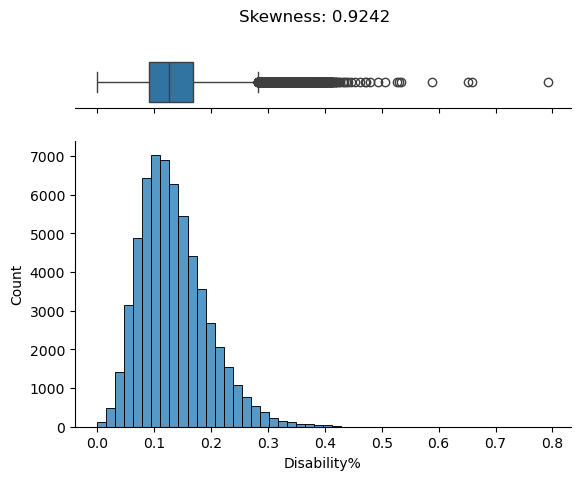

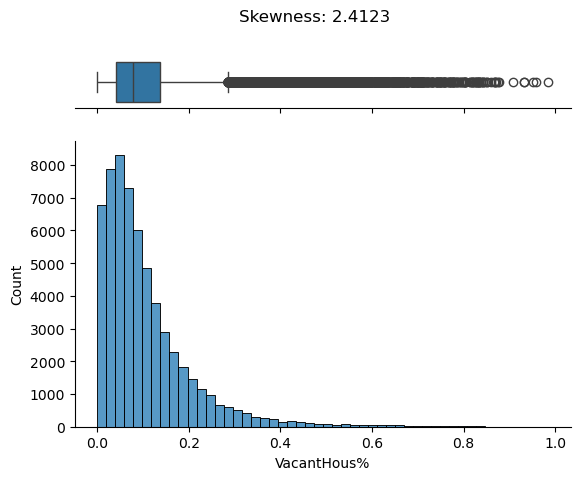

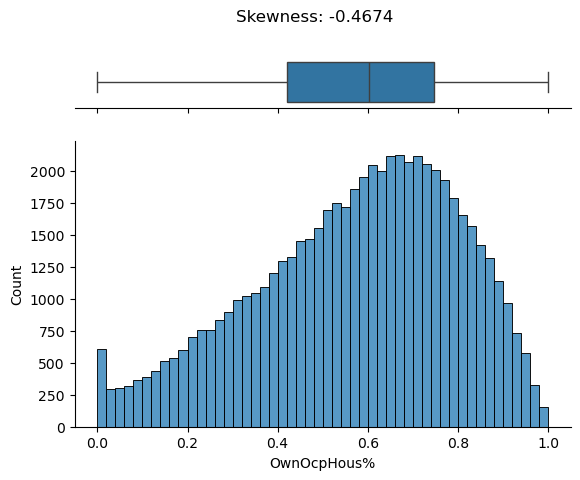

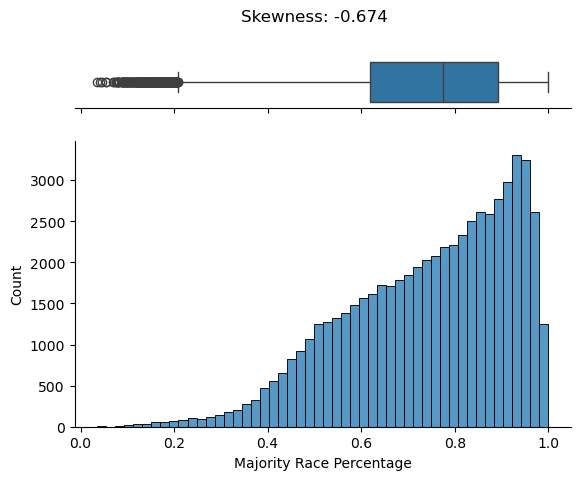

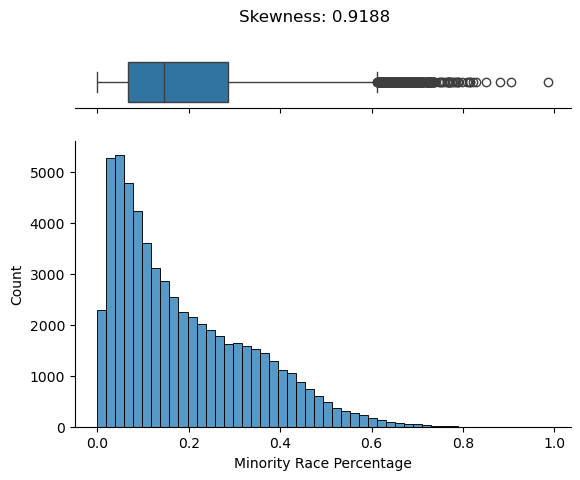

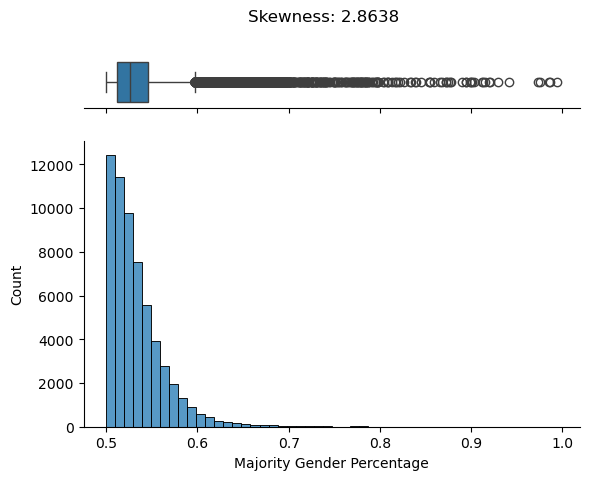

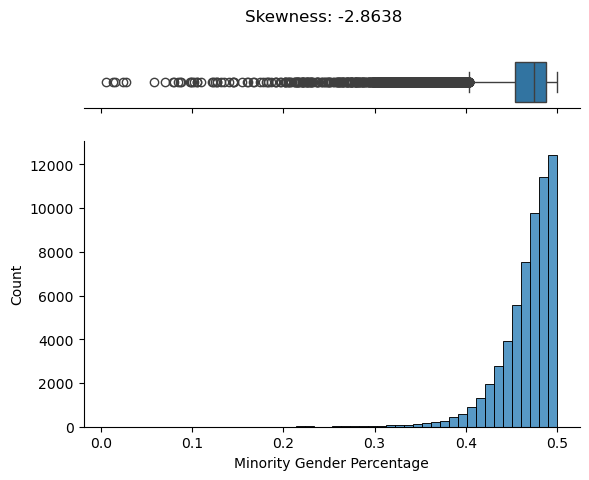

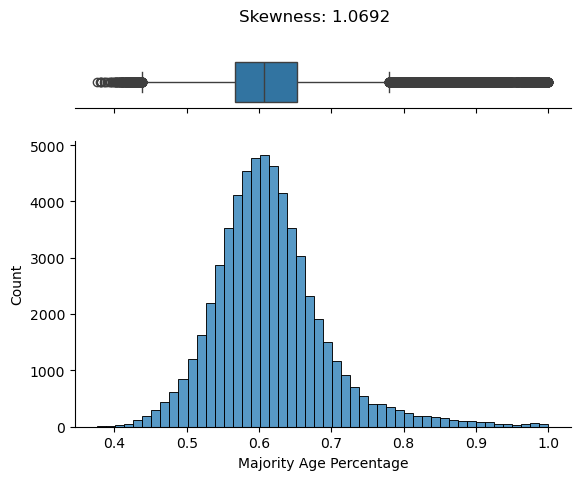

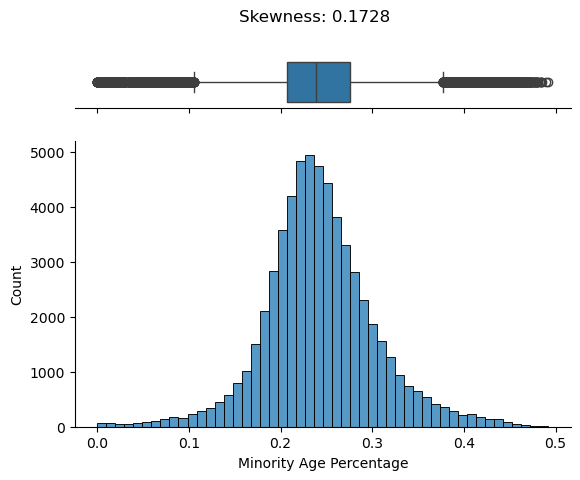

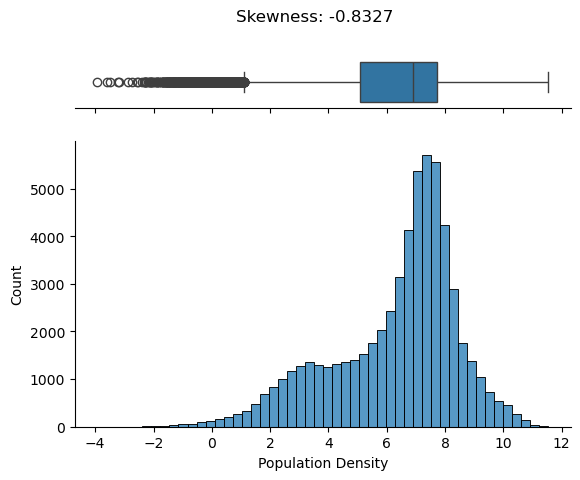

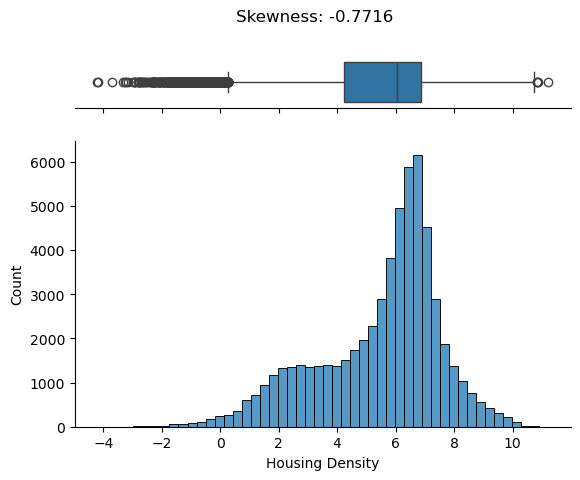

In [179]:
# let's visualize the newly transformed numerical columns
# select only numeric columns
numeric_columns = numeric_columns_transformed[['Land Area (in Sq. Miles) 2020', 'Population', 'Hous_Units', 'Income', 'Poverty%', 'Employment%', 'Disability%', 'VacantHous%', 'OwnOcpHous%', 'Majority Race Percentage', 'Minority Race Percentage', 'Majority Gender Percentage', 'Minority Gender Percentage', 'Majority Age Percentage', 'Minority Age Percentage', 'Population Density', 'Housing Density']]
for col in numeric_columns.columns:
    fig, (ax_box, ax_hist) = plt.subplots(nrows= 2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data= numeric_columns_transformed, x= col, ax= ax_box, orient= 'h')
    sns.histplot(data= numeric_columns_transformed, x= col, ax= ax_hist, bins= 50)
    ax_box.set(yticks=[])
    fig.suptitle(f'Skewness: {np.round(numeric_columns_transformed[col].skew(), 4)}')
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
plt.show()

- Dropping the extreme outlier and log transforming the Land Area, Population Density and Housing Density helped in addressing the extreme skewness.
- The Land Area, population density and housing density's histograms also look more Gaussian.
- This is significant since Pearson Correlation is very sensitive to outliers

### Correlation Matrix

In [187]:
corr = numeric_columns_transformed.corr()
corr

,Land Area (in Sq. Miles) 2020,Population,Hous_Units,Income,Poverty%,Employment%,Disability%,VacantHous%,OwnOcpHous%,Majority Race Percentage,Minority Race Percentage,Majority Gender Percentage,Minority Gender Percentage,Majority Age Percentage,Minority Age Percentage,Population Density,Housing Density
Land Area (in Sq. Miles) 2020,1.000000,0.042091,0.101179,-0.057304,-0.159113,0.179623,0.193639,0.284528,0.396955,0.386935,-0.264799,-0.103481,0.103481,-0.340101,0.136286,-0.977739,-0.979800
Population,0.042091,1.000000,0.781600,0.212833,-0.188744,0.098357,-0.248466,-0.358841,0.183949,-0.121454,0.085573,-0.123424,0.123424,0.014657,0.017422,0.156584,0.108581
Hous_Units,0.101179,0.781600,1.000000,0.085407,-0.140398,0.122926,-0.056664,0.018865,-0.006927,-0.006511,-0.062542,-0.110686,0.110686,0.010531,-0.016302,0.057052,0.086871
Income,-0.057304,0.212833,0.085407,1.000000,-0.637848,0.320507,-0.522634,-0.277752,0.502590,-0.022280,-0.220655,-0.168355,0.168355,-0.024334,-0.034954,0.099887,0.073160
Poverty%,-0.159113,-0.188744,-0.140398,-0.637848,1.000000,-0.466568,0.389051,0.224882,-0.563670,-0.119630,0.259574,0.174921,-0.174921,0.045003,0.098597,0.115009,0.132003
Employment%,0.179623,0.098357,0.122926,0.320507,-0.466568,1.000000,-0.245923,-0.122607,0.300159,0.118144,-0.156128,-0.122787,0.122787,-0.037860,-0.046970,-0.153222,-0.153930
Disability%,0.193639,-0.248466,-0.056664,-0.522634,0.389051,-0.245923,1.000000,0.303943,-0.144684,0.142960,-0.032464,0.066153,-0.066153,-0.213594,0.112884,-0.243694,-0.202596
VacantHous%,0.284528,-0.358841,0.018865,-0.277752,0.224882,-0.122607,0.303943,1.000000,-0.336565,0.153195,-0.086979,0.114446,-0.114446,-0.091172,0.125769,-0.367311,-0.289405
OwnOcpHous%,0.396955,0.183949,-0.006927,0.502590,-0.563670,0.300159,-0.144684,-0.336565,1.000000,0.286408,-0.277173,-0.239183,0.239183,-0.371686,0.129485,-0.348367,-0.392686
Majority Race Percentage,0.386935,-0.121454,-0.006511,-0.022280,-0.119630,0.118144,0.142960,0.153195,0.286408,1.000000,-0.551553,-0.088725,0.088725,-0.254546,0.115242,-0.404876,-0.387251


In [193]:
## Convert the n by n matrix to pairwise table
corr_df = corr.stack().reset_index()
corr_df.columns = ['variable1', 'variable2', 'correlation']

## Remove the self correlations and symmetry elements
corr_df = corr_df[corr_df.variable2 > corr_df.variable1]

## Sort by the absolute value
corr_df = corr_df.loc[corr_df.correlation.abs().sort_values(ascending= False).index]
corr_df.head(n= 20)

,variable1,variable2,correlation
199,Majority Gender Percentage,Minority Gender Percentage,-1.000000
287,Housing Density,Population Density,0.991133
272,Housing Density,Land Area (in Sq. Miles) 2020,-0.979800
15,Land Area (in Sq. Miles) 2020,Population Density,-0.977739
35,Hous_Units,Population,0.781600
235,Majority Age Percentage,Minority Age Percentage,-0.776460
55,Income,Poverty%,-0.637848
140,OwnOcpHous%,Poverty%,-0.563670
163,Majority Race Percentage,Minority Race Percentage,-0.551553
105,Disability%,Income,-0.522634


In [203]:
# we are concerned with highly correlated pairs
corr_df_top = corr_df[corr_df.correlation.abs() > 0.7]
corr_df_top

,variable1,variable2,correlation
199,Majority Gender Percentage,Minority Gender Percentage,-1.000000
287,Housing Density,Population Density,0.991133
272,Housing Density,Land Area (in Sq. Miles) 2020,-0.979800
15,Land Area (in Sq. Miles) 2020,Population Density,-0.977739
35,Hous_Units,Population,0.781600
235,Majority Age Percentage,Minority Age Percentage,-0.776460


### Key Observations based on the Correlation Matrix 
- Majority Gender Percentage and Minority Gender Percentage have a correlation of -1. This is a perfect inverse relationship.
- Housing Density and Population Density have a correlation of 0.991. This is extremely high and suggests that these two variables convey nearly the same information.
- Housing Density and Land Area (in Sq. Miles) 2020 have a correlation of -0.979, which means larger land areas tend to have lower housing densities.
- Land Area (in Sq. Miles) 2020 and Population Density have a similarly strong negative correlation of -0.977, reinforcing the idea that as the area increases, population density decreases.
- Hous_Units and Population have a correlation of 0.781, indicating a moderate positive correlation.

##### Next steps (since these features will be used for a logistic regression model) 
- Remove redundant features especially ones with high correlations to reduce multicollinearity
- Scale the features (lasso/ridge regression is very sensitive to the magnitude of the data)

### Null and Alternative Hypothesis
- Null Hypothesis: There is no linear relationship between the variables in the dataset
- Alternative Hypothesis: There are significant linear relationships between variables in the dataset

In [229]:
# calculating the statistical significance of the correlation coefficients for highly correlated pairs

# Calculate p-values
p_values = []

for i, row in corr_df_top.iterrows():
    var1 = row['variable1']
    var2 = row['variable2']
    correlation, p_value = pearsonr(numeric_columns_transformed[var1], numeric_columns_transformed[var2])
    p_values.append(p_value)

corr_df_top['P-Value'] = p_values

# Set the display format for float precision
pd.options.display.float_format = '{:.10e}'.format
# Show all columns
pd.set_option('display.width', 1000)        # Set the display width to prevent wrapping

# drop t_stat and p_value 
corr_df_top.drop(columns = ['t_stat', 'P-Value'], inplace = True )

In [231]:
corr_df_top

,variable1,variable2,correlation,p_value
199,Majority Gender Percentage,Minority Gender Percentage,-1.0000000000e+00,0.0000000000e+00
287,Housing Density,Population Density,9.9113277227e-01,0.0000000000e+00
272,Housing Density,Land Area (in Sq. Miles) 2020,-9.7980025637e-01,0.0000000000e+00
15,Land Area (in Sq. Miles) 2020,Population Density,-9.7773904493e-01,0.0000000000e+00
35,Hous_Units,Population,7.8159971290e-01,0.0000000000e+00
235,Majority Age Percentage,Minority Age Percentage,-7.7646002128e-01,0.0000000000e+00


Given that the p-values of the highly correlated pair variables are all extremely small (in all cases, they are mostly 0) suggests a strong evidence against our null hypothesis. This implies that there are significant linear relationships in the dataset. 

These tests are a good introductory insights for building our model due to multiple reasons: 
1) Understanding the relationships between variables helps identify the strength and direction of their associations
2) Reducing multicollinearity, by removing highly correlated variables might improve the performance and interpretability of our model and also prevents redudancy 
3) Feature selection, helps us decide which features to include in our model